### RandomForest
#### - decision Tree 는 전체 데이터에서 한개의 결정트리를 만듦
#### - RandomForest는 랜덤하게 데이터의 일부 또는 독립변수의 일부를 나눠서 여러개의 결정트리를 만들고 결과를 종합해서 결정트리를 만듦
#### - 데이터도 랜덤하게 선택하고 독립변수도 랜덤하게 선택
---
#### - 앙상블 : 여러개의 모델을 만들어 평균을 구하거나 투표로 최적의 값을 구하는 방법 - 확률적으로 의사결정트리보다 성능이 좋음음
#### - 장점 : 성능이 안정적이고 보편적으로 성능이 좋다
####          하나의 모델을 사용하는것보다 여러개의 모델의 결과를 평균치로 구하는 것이 더 좋음
#### - 단점 : 설명력이 어렵고, 계산량이 많음(수십~수백개 모델을 생성하므로)

# 강의자료 사이트 https://band.us/band/92125841

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import korean_language

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
np.random.seed(9)

In [10]:
train_x, test_x, train_y, test_y = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((426, 30), (143, 30), (426,), (143,))

In [25]:
rfc = RandomForestClassifier(n_estimators=500)
dt = DecisionTreeClassifier(max_depth=3)

In [26]:
rfc.fit(train_x, train_y)
dt.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3)

In [27]:
rfc.score(test_x, test_y).round(3)

0.944

In [28]:
dt.score(test_x, test_y).round(3)

0.888

In [29]:
df = pd.DataFrame({'feature':cancer.feature_names,
             'importance':rfc.feature_importances_})

In [30]:
dt_df = pd.DataFrame({'feature':cancer.feature_names,
             'importance':dt.feature_importances_})

In [31]:
df = df.sort_values(by = 'importance', ascending=False)
dt_df = dt_df.sort_values(by = 'importance', ascending=False)

In [32]:
x = df.feature
y = df.importance
x_dt = dt_df.feature
y_dt = dt_df.importance

Text(0.5, 1.0, 'RnadomForet')

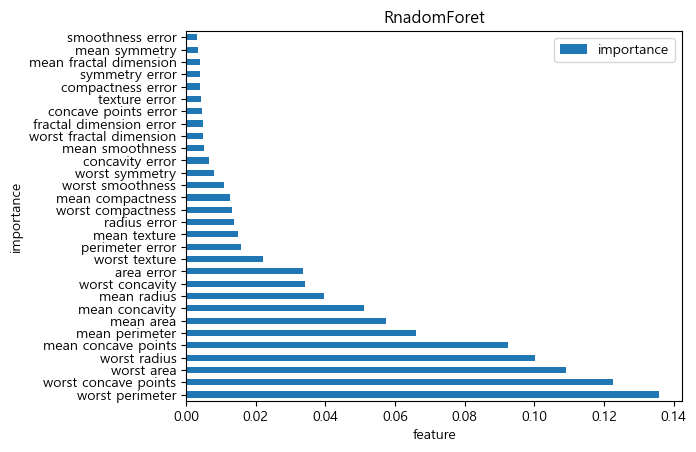

In [33]:
ddf = df.set_index('feature')

# 막대 그래프 그리기
ddf.plot(kind='barh')
plt.xlabel('feature')
plt.ylabel('importance')
plt.title('RnadomForet')

Text(0.5, 1.0, 'DecisionTree')

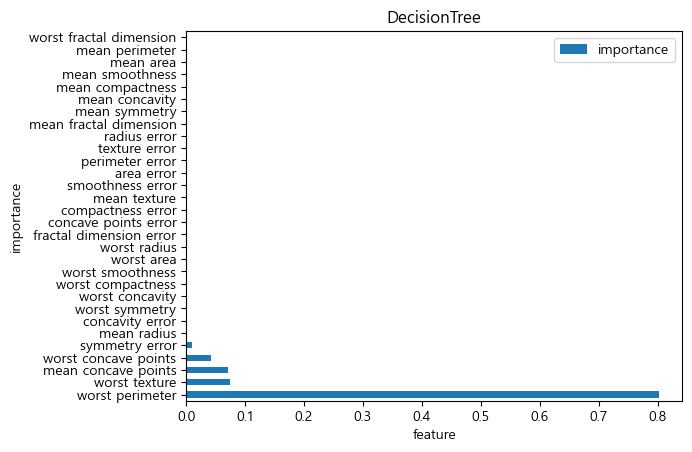

In [35]:
ddf_dt = dt_df.set_index('feature')

# 막대 그래프 그리기
ddf_dt.plot(kind='barh')
plt.xlabel('feature')
plt.ylabel('importance')
plt.title('DecisionTree')

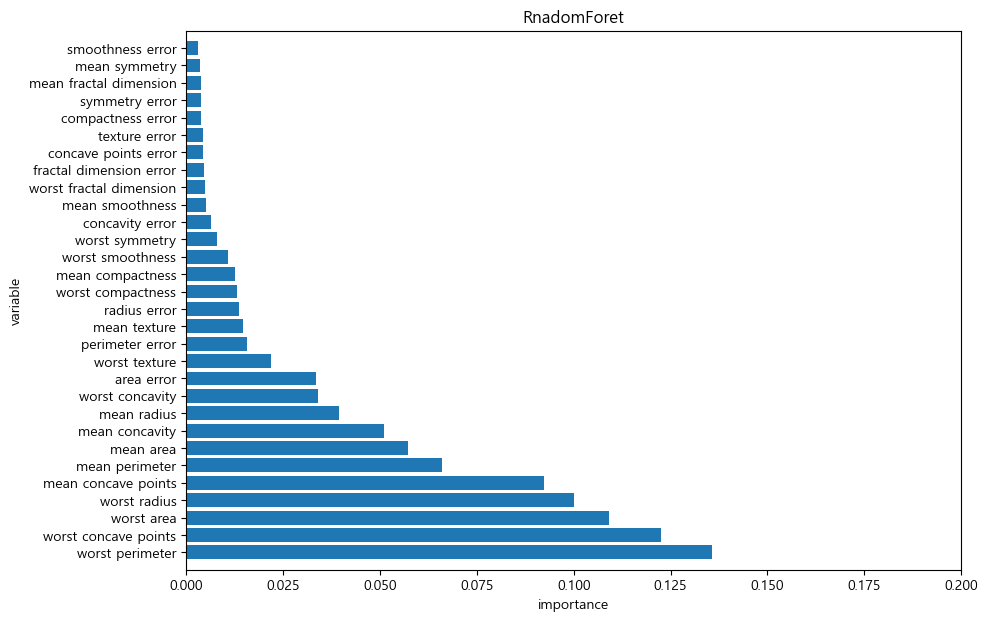

In [36]:
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x,y)
plt.yticks(ypos,x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0,0.2)
plt.ylim(-1, len(ypos))
plt.title('RnadomForet')
plt.show()

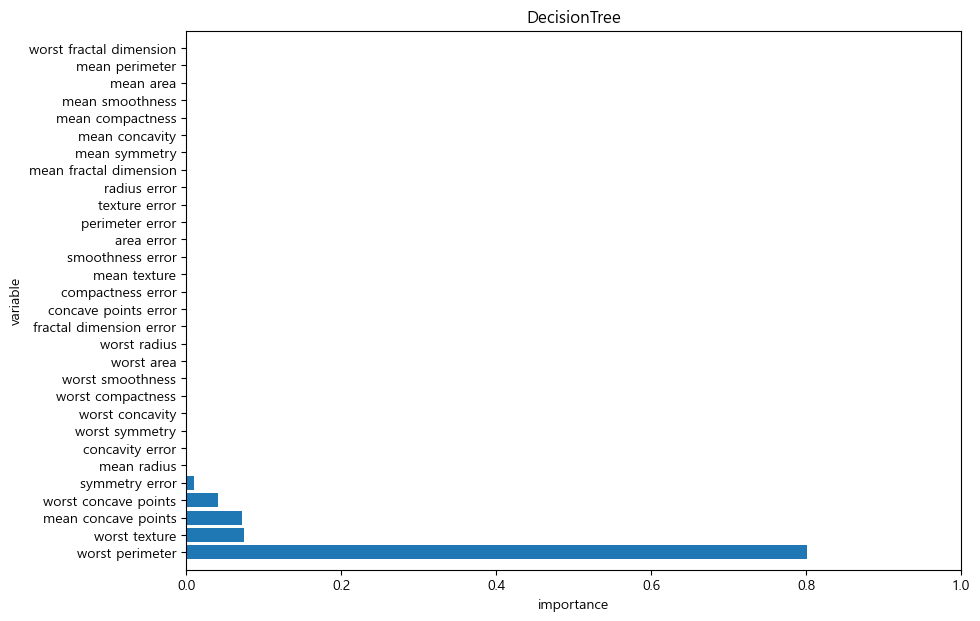

In [39]:
ypos = np.arange(len(x_dt))
plt.figure(figsize=(10,7))
plt.barh(x_dt, y_dt)
plt.yticks(ypos, x_dt)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0,1)
plt.ylim(-1, len(ypos))
plt.title('DecisionTree')
plt.show()